In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 1,
    "path": "../../",
    "exp_name": "Trees_TCE_KL",
    "split": "CV", #CV, random_split

    "cv_folds": 10,
    "plot": True,
    "calib_methods": ["RF", 
                      "Platt", "ISO", "Beta", "CRF",
                     ],
    "metrics": ["acc", "tce", "logloss", "brier", "ece", "auc"],
    
    #data
    "data_name": "synthetic",
    "plot_data": True,
    "data_size": 1000,
    "n_features": 2,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 5000,
    "boot_count": 40,

    "opt_cv":5, 
    "opt_n_iter":40,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [10],
                    "max_depth": [2,3,4,5,6,7,8,10,15,20,30,40,50,60,100],
                    "criterion": ["gini", "entropy"],
                    "max_features": ["sqrt", "log2"],
                    "min_samples_split": [2,3,4,5],
                    "min_samples_leaf": [1,2,3],
                    },

    # RF hyper opt
    "oob": False,
    "laplace": 0, # if set to 1, OOB must be false

    "hyper_opt": "Manual",
    "depth": 4,
}
exp_key = "n_estimators"
exp_values = [1,2,3,4,5,10,20,50,100,200,500]

In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

Success in 2 n_features
exp_param 1 done
Success in 2 n_features
exp_param 2 done
Success in 2 n_features
exp_param 3 done
Success in 2 n_features
exp_param 4 done
Success in 2 n_features
exp_param 5 done
Success in 2 n_features
exp_param 10 done
Success in 2 n_features
exp_param 20 done
Success in 2 n_features
exp_param 50 done
Success in 2 n_features
exp_param 100 done
Success in 2 n_features
exp_param 200 done
Success in 2 n_features
exp_param 500 done


In [4]:
print(params["calib_methods"][tables["tce"].loc["Rank"].argmin()])
tables["tce"]

RF


,RF,Platt,ISO,Beta,CRF
Data,,,,,
1,0.030325,0.036546,0.305191,0.038632,0.033103
2,0.030325,0.036546,0.305191,0.038632,0.033103
3,0.030325,0.036546,0.305191,0.038632,0.033103
4,0.030325,0.036546,0.305191,0.038632,0.033103
5,0.030325,0.036546,0.305191,0.038632,0.033103
10,0.030325,0.036546,0.305191,0.038632,0.033103
20,0.030325,0.036546,0.305191,0.038632,0.033103
50,0.030325,0.036546,0.305191,0.038632,0.033103
100,0.030325,0.036546,0.305191,0.038632,0.033103


In [5]:
print(params["calib_methods"][tables["brier"].loc["Rank"].argmin()])
tables["brier"]

RF


,RF,Platt,ISO,Beta,CRF
Data,,,,,
1,0.156241,0.157567,0.159361,0.157607,0.157937
2,0.156241,0.157567,0.159361,0.157607,0.157937
3,0.156241,0.157567,0.159361,0.157607,0.157937
4,0.156241,0.157567,0.159361,0.157607,0.157937
5,0.156241,0.157567,0.159361,0.157607,0.157937
10,0.156241,0.157567,0.159361,0.157607,0.157937
20,0.156241,0.157567,0.159361,0.157607,0.157937
50,0.156241,0.157567,0.159361,0.157607,0.157937
100,0.156241,0.157567,0.159361,0.157607,0.157937


In [6]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF', 'Platt', 'ISO', 'Beta', 'CRF']

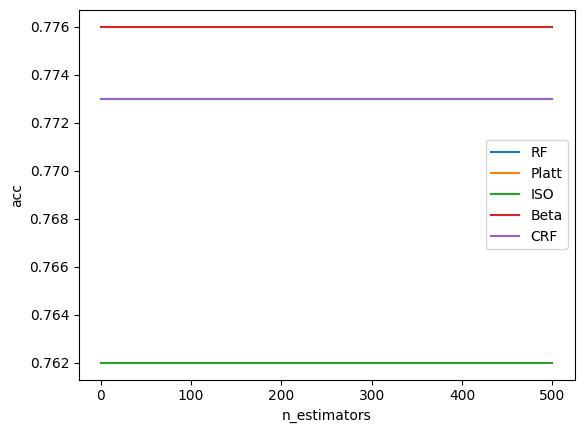

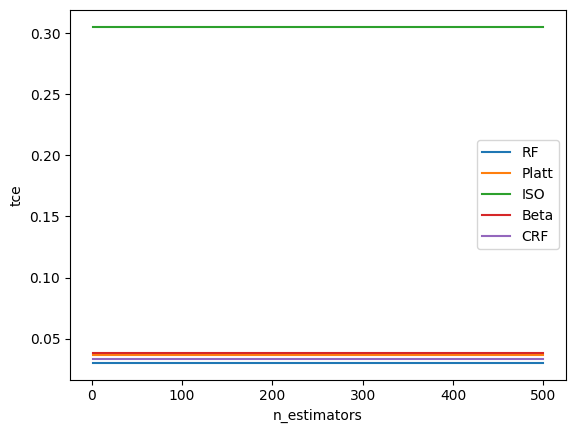

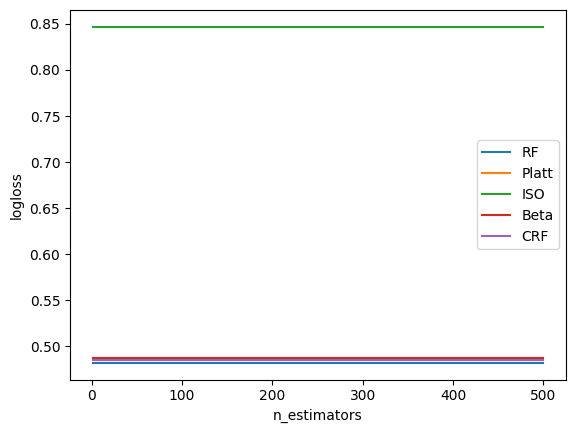

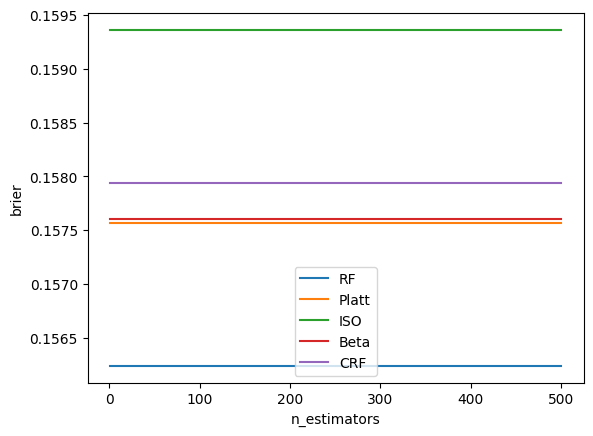

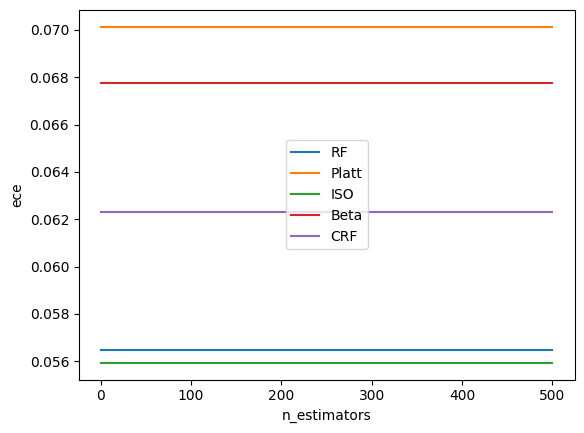

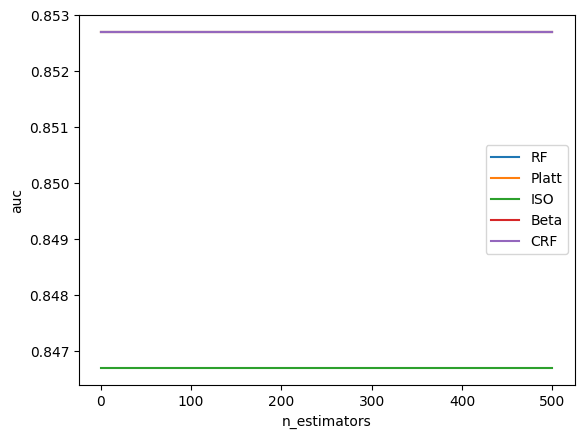

In [7]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)